<ipython-input-3-5809af13ad24>:12: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Head:
      Glacier ID Political Unit Continent Basin Code Location Code  \
0  AF5Q112B0001    AFGHANISTAN      ASIA       Q112            B0   
1  AF5Q112B0002    AFGHANISTAN      ASIA       Q112            B0   
2  AF5Q112B0003    AFGHANISTAN      ASIA       Q112            B0   
3  AF5Q112B0004    AFGHANISTAN      ASIA       Q112            B0   
4  AF5Q112B0005    AFGHANISTAN      ASIA       Q112            B0   

  Glacier Code Glacier Name  Latitude  Longitude  Primary Class  ...  \
0            1          NaN    34.672     68.874            9.0  ...   
1            2          NaN    34.676     68.855            9.0  ...   
2            3          NaN    34.689     68.854            9.0  ...   
3            4          NaN    34.707     68.857            9.0  ...   
4            5          NaN    34.719     68.852            9.0  ...   

   Maximum Length  Maximum Length Exposed  Maximum Length Ablation  \
0             1.9                     NaN                      NaN 

<ipython-input-3-5809af13ad24>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


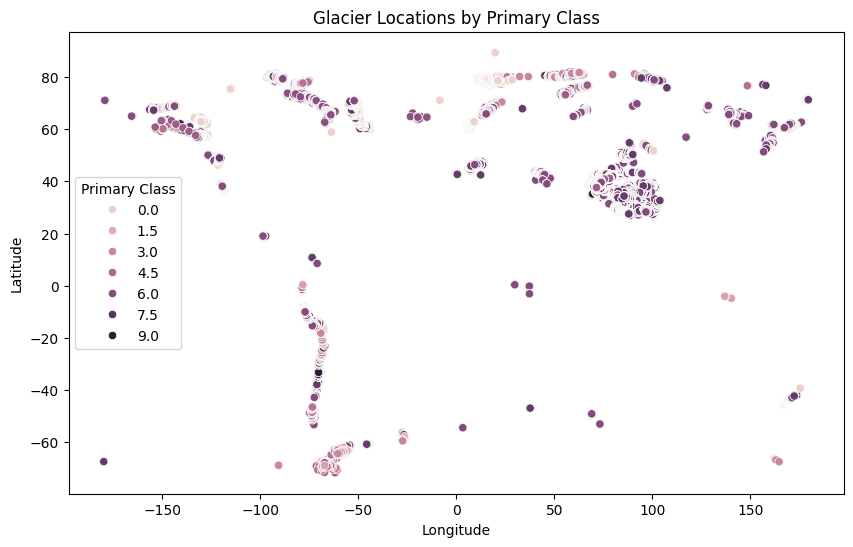

Feature Shape:  (132890, 46)
Target Shape:  (132890,)
Mean Squared Error (MSE): 0.25010224440113504
R-squared (R2): -0.00046908024025182904
Accuracy: 0.5010660445982893


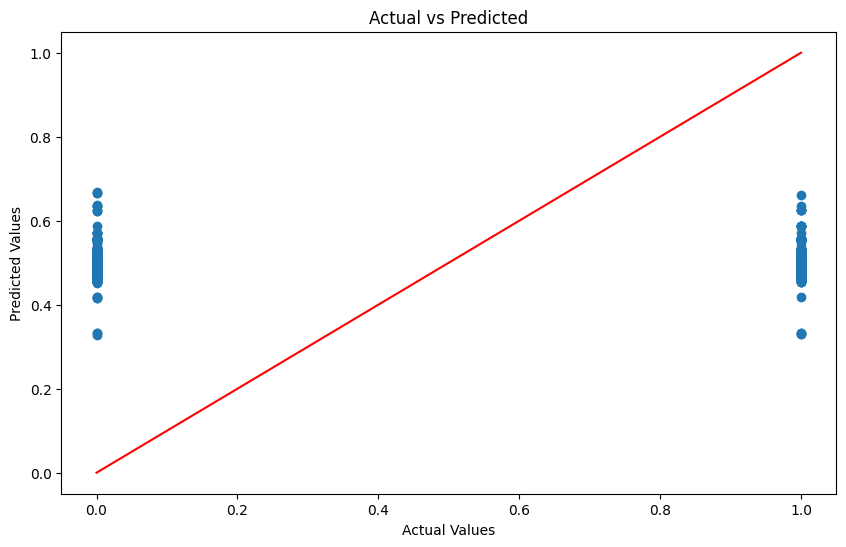

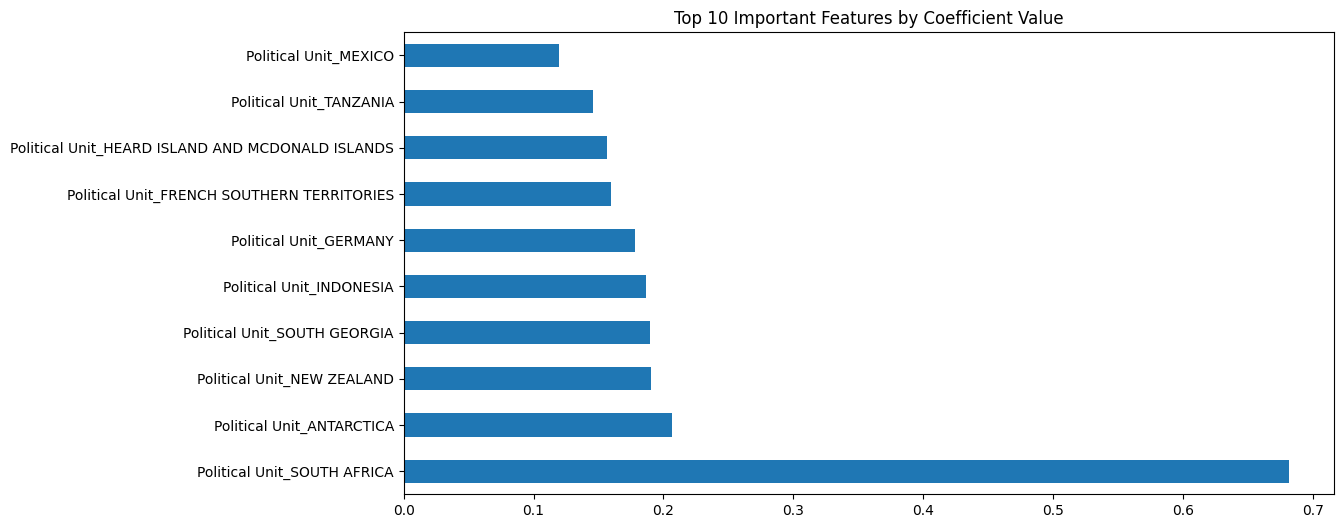

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Load the dataset
file_path = '/content/drive/MyDrive/database.csv (1)/database.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print("Dataset Head:\n", df.head())

# Check for missing values column-wise
print("\nMissing Values per Column:\n", df.isnull().sum())

# Drop columns with too many missing values (e.g., >50% missing data)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

# Fill remaining missing values with appropriate values (e.g., mean for numeric columns)
df = df.fillna(df.mean(numeric_only=True))

# You can also use forward-fill or backward-fill for categorical data
df = df.fillna(method='ffill')

# Ensure the dataset is not empty after handling missing values
if df.empty:
    raise ValueError("The dataset is empty after cleaning. Please check the data.")

# Exploratory Data Analysis (EDA)
# Example of visualizing glacier locations on a map (latitude and longitude)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Primary Class', data=df)
plt.title('Glacier Locations by Primary Class')
plt.show()

# Feature Engineering: Converting Categorical Data into Numeric
df_encoded = pd.get_dummies(df[['Political Unit', 'Continent', 'Primary Class']], drop_first=True)

# Selecting important features for the model
features = df[['Latitude', 'Longitude']].join(df_encoded)

# Placeholder for binary classification target (e.g., High Risk vs Low Risk)
# For accuracy calculation, let's assume we have a binary target like [0, 1]
target = np.random.choice([0, 1], size=len(df))  # Replace with actual target

# Verify the shape of features and target
print("Feature Shape: ", features.shape)
print("Target Shape: ", target.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model Building: LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model Evaluation: Continuous metrics (MSE, R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# For "accuracy", convert predictions to binary (0 or 1)
y_pred_binary = np.round(y_pred)  # Round predictions to the nearest integer (0 or 1)

# Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Plotting Predicted vs Actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Feature Importance (For linear regression, feature coefficients)
plt.figure(figsize=(12,6))
coefficients = pd.Series(model.coef_, index=features.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features by Coefficient Value')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [ ]:
file_path = '/content/drive/MyDrive/database.csv (1)/database.csv'
df = pd.read_csv(file_path)
print("Dataset Head:\n", df.head())


<ipython-input-4-10219c2b0bde>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Head:
      Glacier ID Political Unit Continent Basin Code Location Code  \
0  AF5Q112B0001    AFGHANISTAN      ASIA       Q112            B0   
1  AF5Q112B0002    AFGHANISTAN      ASIA       Q112            B0   
2  AF5Q112B0003    AFGHANISTAN      ASIA       Q112            B0   
3  AF5Q112B0004    AFGHANISTAN      ASIA       Q112            B0   
4  AF5Q112B0005    AFGHANISTAN      ASIA       Q112            B0   

  Glacier Code Glacier Name  Latitude  Longitude  Primary Class  ...  \
0            1          NaN    34.672     68.874            9.0  ...   
1            2          NaN    34.676     68.855            9.0  ...   
2            3          NaN    34.689     68.854            9.0  ...   
3            4          NaN    34.707     68.857            9.0  ...   
4            5          NaN    34.719     68.852            9.0  ...   

   Maximum Length  Maximum Length Exposed  Maximum Length Ablation  \
0             1.9                     NaN                      NaN 

In [ ]:
print("\nMissing Values per Column:\n", df.isnull().sum())

threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(method='ffill')



Missing Values per Column:
 Glacier ID                          0
Political Unit                      0
Continent                           0
Basin Code                          0
Location Code                       0
Glacier Code                        0
Glacier Name                    86139
Latitude                            0
Longitude                           0
Primary Class                    1484
Glacier Source                    144
Basin Count                    117332
Glacier Form                     1077
Glacier Activity                  115
Activity Start                 128688
Activity End                   132747
Minimum Elevation               15728
Minimum Elevation Exposed       43193
Mean Elevation                  51291
Mean Elevation Accumulation    117417
Mean Elevation Ablation        121837
Maximum Elevation               17422
Snow Line Elevation            104042
Snow Line Accuracy             109566
Glacier Area                     4516
Area Accuracy        

<ipython-input-5-bd435f8f7a4c>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


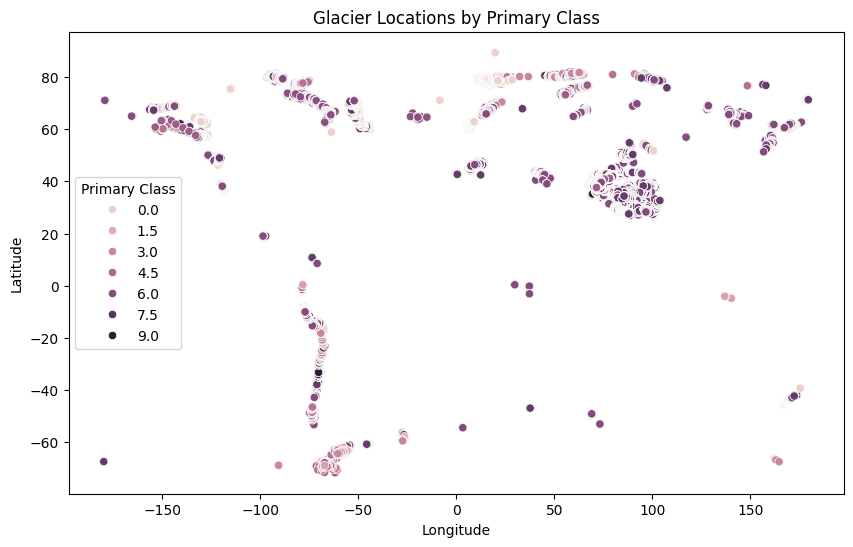

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Primary Class', data=df)
plt.title('Glacier Locations by Primary Class')
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df[['Political Unit', 'Continent', 'Primary Class']], drop_first=True)
features = df[['Latitude', 'Longitude']].join(df_encoded)


In [ ]:
target = np.random.choice([0, 1], size=len(df))  # Replace with actual target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.2500307724608137
R-squared (R2): -0.00012543130479403253


In [ ]:
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5001379587127198


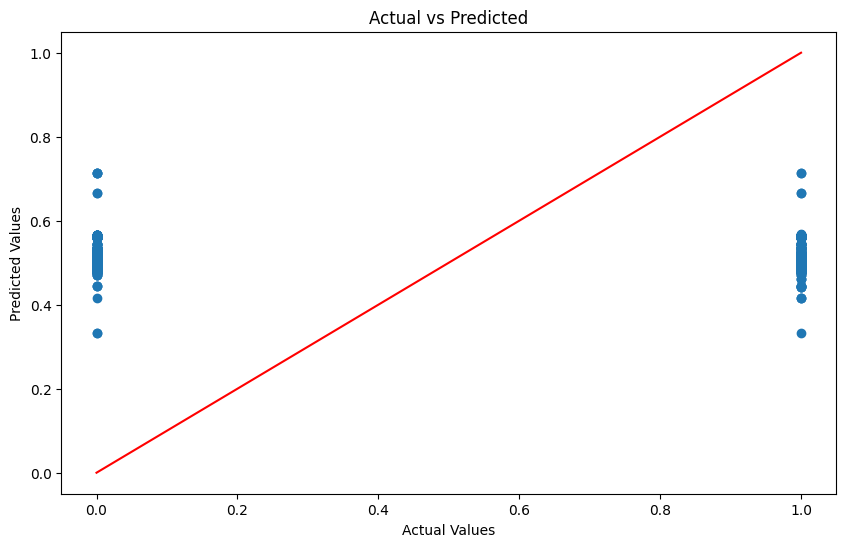

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


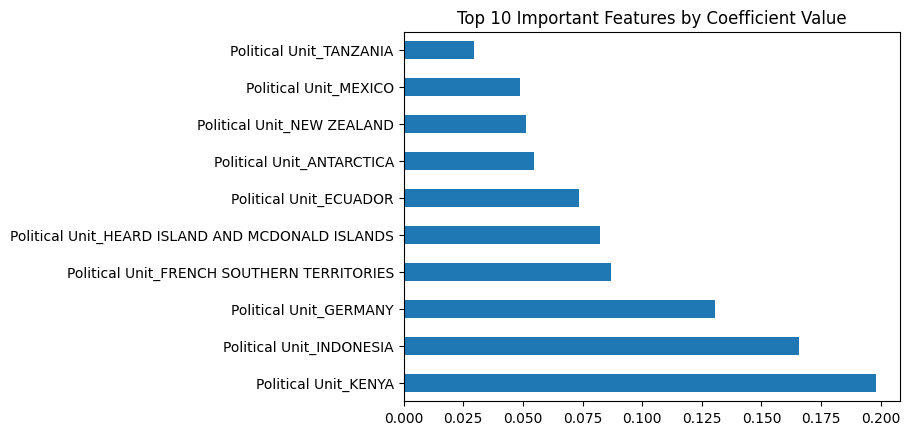

In [ ]:
coefficients = pd.Series(model.coef_, index=features.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features by Coefficient Value')
plt.show()
